In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.datasets import california_housing

from scipy import stats
import statsmodels.api as sm


**On this modelling attempt we will go back to basics of the property market and utilise what we know about the real world:**

*A good rule of thumb is that big houses in nice areas will be expensive and small houses in bad areas should be 
inexpensive. Surely some level of fit and prediction can be achieved with these features.*

In [61]:
df = pd.read_csv('kc_house_data.csv')

In [62]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [63]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [64]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [65]:
df['waterfront'] = df['waterfront'].fillna(0.0)

In [66]:
df['waterfront'].isna().sum()

0

In [67]:
#view tells us whether a property has been viewed or not. 
df.drop(columns='view', inplace=True)

In [68]:
#Check new column list
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [69]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [70]:
df['yr_renovated'].isna().sum()

3842

In [71]:
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

In [72]:
df['date'].min()

'1/10/2015'

In [73]:
df.loc[(df['yr_renovated']>=2000), 'renovate_15'] = 1
df.loc[(df['yr_renovated']<2000), 'renovate_15'] = 0

In [74]:
df['renovate_15'].unique()

array([0., 1.])

In [75]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [76]:
#outlier at bedroom = 33 should be removed as it is far higher than rest of set
df = df[df['bedrooms']!=33]

In [77]:
#check outlier removed
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
renovate_15      21596 non-null float64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [79]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        83
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
1770.0        1
4820.0        1
2300.0        1
2350.0        1
3480.0        1
2730.0        1
2610.0        1
1852.0        1
1281.0        1
1548.0        1
2180.0        1
2500.0        1
65.0          1
518.0         1
935.0         1
946.0         1
915.0         1
415.0         1
666.0         1
2050.0        1
3260.0        1
225.0         1
2196.0        1
172.0         1
508.0         1
1008.0        1
1248.0        1
1798.0        1
2720.0        1
1930.0        1
Name: sqft_basement, Len

In [80]:
#sqft basement needs to be converted to int64 and '?' removed
df['sqft_basement'].replace(to_replace = '?', value = '0.0', inplace=True)

In [81]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        83
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
360.0        72
          ...  
1770.0        1
4820.0        1
2300.0        1
2350.0        1
3480.0        1
2810.0        1
2610.0        1
1852.0        1
1281.0        1
1548.0        1
2180.0        1
2500.0        1
65.0          1
518.0         1
935.0         1
946.0         1
915.0         1
666.0         1
2050.0        1
3260.0        1
225.0         1
2196.0        1
172.0         1
508.0         1
1008.0        1
1248.0        1
1798.0        1
2720.0        1
2730.0        1
1930.0        1
Name: sqft_basement, Len

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
renovate_15      21596 non-null float64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [83]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
renovate_15      21596 non-null float64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.6+ MB


In [85]:
#option to make basement a binary option 1 = propert has basement, 0 = no basement

In the following two cells we set up our data split for furture train and test methods

In [86]:
#df, df_test, target, target_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [87]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovate_15
id,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.003602,-0.023721,0.008169,-0.010831,-0.004336,0.021589,-0.010619,-0.008195,-0.001766,0.020643,-0.002734,-0.138570,-0.008119
price,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.036031,0.667964,0.605392,0.321103,0.053965,0.117858,-0.053409,0.306687,0.022047,0.585267,0.082849,0.106006
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.023440,0.366174,0.492543,0.303517,0.160736,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892,0.033965
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,-0.126443,0.665834,0.686664,0.278504,0.507166,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297,0.063788
sqft_living,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,-0.059397,0.762776,0.876448,0.428683,0.318140,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337,0.051032
sqft_lot,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,-0.008806,0.114726,0.184134,0.015038,0.052939,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203,-0.013416
floors,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,-0.264013,0.458783,0.523970,-0.241845,0.489175,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734,0.004070
waterfront,-0.003602,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.016659,0.082817,0.071776,0.083053,-0.024491,0.073938,0.028925,-0.012154,-0.037632,0.083822,0.030657,0.014794
condition,-0.023721,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,1.000000,-0.146854,-0.158826,0.168431,-0.361555,-0.055795,0.002835,-0.015209,-0.105800,-0.092979,-0.003093,-0.072809
grade,0.008169,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,-0.146854,1.000000,0.756069,0.165863,0.447854,0.015618,-0.185761,0.113602,0.200324,0.713863,0.120974,0.035661


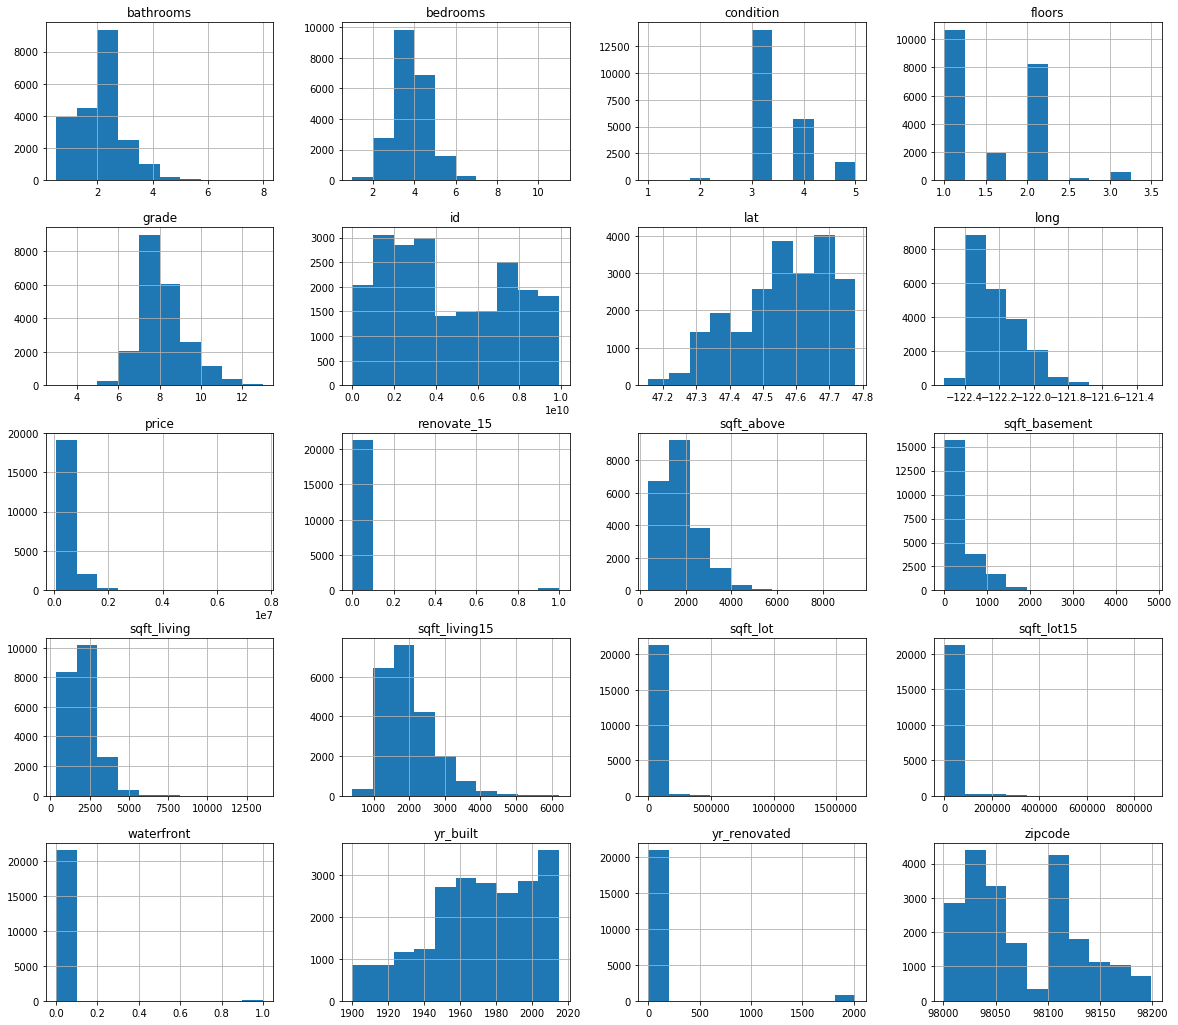

In [88]:
df.hist(figsize=(20,18));

In [89]:
import warnings
warnings.filterwarnings('ignore')

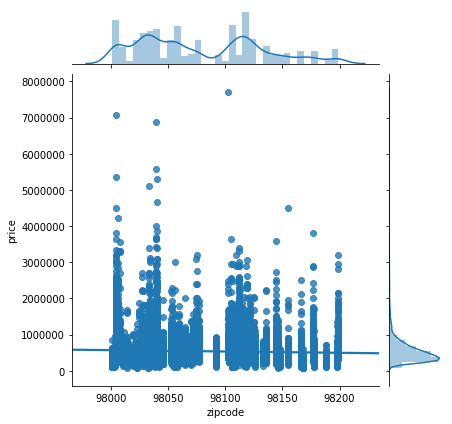

In [90]:
sns.jointplot('zipcode', 'price', data=df, kind='reg');

In [91]:
# zipcodes are a categorical feature so we should attempt to create dummies for this feature. 
# Due to the quantity of zipcodes in the data set we will have to create a relatively small number of zipcode bins 
# which will force us to assume that numerically adjacent codes predict similar house prices. 

In [92]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovate_15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0


In [93]:
df = df.sort_values('zipcode')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovate_15
2648,1687000200,4/10/2015,259000.0,3,2.5,2153,4400,2.0,0.0,3,...,2153,0.0,2007,0.0,98001,47.2872,-122.283,2434,4400,0.0
18360,2895550330,5/6/2015,290000.0,3,2.5,1600,6848,2.0,0.0,3,...,1600,0.0,2000,0.0,98001,47.3303,-122.271,1700,7210,0.0
9851,6648770240,12/24/2014,360000.0,4,2.5,2390,7056,2.0,0.0,3,...,2390,0.0,1990,0.0,98001,47.3385,-122.264,2590,7801,0.0
15200,3876500290,3/5/2015,175000.0,3,1.0,1070,6164,1.0,0.0,3,...,1070,0.0,1967,0.0,98001,47.3377,-122.291,1320,7920,0.0
12114,1311000270,4/16/2015,247000.0,5,2.0,1590,9350,1.0,0.0,5,...,1060,530.0,1962,0.0,98001,47.3398,-122.286,1460,8210,0.0


In [94]:
df.zipcode.unique()

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199])

In [96]:
df.grade.unique()

array([ 8,  7,  9,  6,  5, 10, 11, 12, 13,  4,  3])

In [97]:
#we'll split into 10 bins so 7 zips per bin, while we're at it we'll create bins for grade too - might be useful. 
zip_bins = [0,98007, 98023, 98032, 98045, 98065, 98102, 98112, 98125, 98155, 98199]
zip_grade = [0, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5]

In [98]:
bins_zip = pd.cut(df['zipcode'], zip_bins)
grade_zip = pd.cut(df['grade'], zip_grade)

In [99]:
bins_zip = bins_zip.cat.as_ordered()
bins_zip.head()

2648     (0, 98007]
18360    (0, 98007]
9851     (0, 98007]
15200    (0, 98007]
12114    (0, 98007]
Name: zipcode, dtype: category
Categories (10, interval[int64]): [(0, 98007] < (98007, 98023] < (98023, 98032] < (98032, 98045] ... (98102, 98112] < (98112, 98125] < (98125, 98155] < (98155, 98199]]

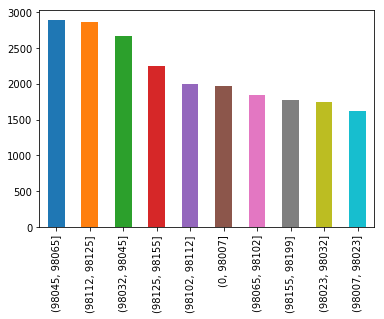

In [100]:
bins_zip.value_counts().plot(kind='bar')

In [101]:
df['zipcode'] = bins_zip
bins_zip.describe()

count              21596
unique                10
top       (98045, 98065]
freq                2882
Name: zipcode, dtype: object

In [102]:
grade_zip = grade_zip.cat.as_ordered()
grade_zip.head()

2648     (7.5, 8.5]
18360    (6.5, 7.5]
9851     (8.5, 9.5]
15200    (6.5, 7.5]
12114    (6.5, 7.5]
Name: grade, dtype: category
Categories (11, interval[float64]): [(0.0, 3.5] < (3.5, 4.5] < (4.5, 5.5] < (5.5, 6.5] ... (9.5, 10.5] < (10.5, 11.5] < (11.5, 12.5] < (12.5, 13.5]]

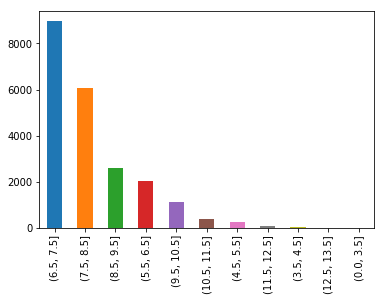

In [103]:
grade_zip.value_counts().plot(kind='bar');

In [104]:
zip_series = pd.Series(df['zipcode'])
grade_series = pd.Series(df['grade'])

In [105]:
#create dummy variables
zip_dums = pd.get_dummies(bins_zip, prefix='zipcode', drop_first=True)
grade_dums = pd.get_dummies(bins_zip, prefix='grade', drop_first=True)

In [107]:
dum_df = df.drop(['zipcode', 'grade'], axis = 1)

In [114]:
model_df = pd.concat([dum_df, zip_dums, grade_dums], axis=1)
model_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,"zipcode_(98155, 98199]","grade_(98007, 98023]","grade_(98023, 98032]","grade_(98032, 98045]","grade_(98045, 98065]","grade_(98065, 98102]","grade_(98102, 98112]","grade_(98112, 98125]","grade_(98125, 98155]","grade_(98155, 98199]"
2648,1687000200,4/10/2015,259000.0,3,2.5,2153,4400,2.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
18360,2895550330,5/6/2015,290000.0,3,2.5,1600,6848,2.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
9851,6648770240,12/24/2014,360000.0,4,2.5,2390,7056,2.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
15200,3876500290,3/5/2015,175000.0,3,1.0,1070,6164,1.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
12114,1311000270,4/16/2015,247000.0,5,2.0,1590,9350,1.0,0.0,5,...,0,0,0,0,0,0,0,0,0,0


In [115]:
model_df.shape

(21596, 37)

In [116]:
model_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovate_15', 'zipcode_(98007, 98023]',
       'zipcode_(98023, 98032]', 'zipcode_(98032, 98045]',
       'zipcode_(98045, 98065]', 'zipcode_(98065, 98102]',
       'zipcode_(98102, 98112]', 'zipcode_(98112, 98125]',
       'zipcode_(98125, 98155]', 'zipcode_(98155, 98199]',
       'grade_(98007, 98023]', 'grade_(98023, 98032]', 'grade_(98032, 98045]',
       'grade_(98045, 98065]', 'grade_(98065, 98102]', 'grade_(98102, 98112]',
       'grade_(98112, 98125]', 'grade_(98125, 98155]', 'grade_(98155, 98199]'],
      dtype='object')

In [160]:
df1 = model_df[['price', 'bathrooms', 'bedrooms', 'sqft_above', 'sqft_basement', 
              'sqft_living', 'sqft_living15', 'sqft_lot15', 'zipcode_(98007, 98023]',
       'zipcode_(98023, 98032]', 'zipcode_(98032, 98045]',
       'zipcode_(98045, 98065]', 'zipcode_(98065, 98102]',
       'zipcode_(98102, 98112]', 'zipcode_(98112, 98125]',
       'zipcode_(98125, 98155]', 'zipcode_(98155, 98199]', 'grade_(98007, 98023]', 'grade_(98023, 98032]', 'grade_(98032, 98045]',
       'grade_(98045, 98065]', 'grade_(98065, 98102]', 'grade_(98102, 98112]',
       'grade_(98112, 98125]', 'grade_(98125, 98155]', 'grade_(98155, 98199]']]

In [161]:
df1.head()

,price,bathrooms,bedrooms,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,"zipcode_(98007, 98023]","zipcode_(98023, 98032]",...,"zipcode_(98155, 98199]","grade_(98007, 98023]","grade_(98023, 98032]","grade_(98032, 98045]","grade_(98045, 98065]","grade_(98065, 98102]","grade_(98102, 98112]","grade_(98112, 98125]","grade_(98125, 98155]","grade_(98155, 98199]"
2648,259000.0,2.5,3,2153,0.0,2153,2434,4400,0,0,...,0,0,0,0,0,0,0,0,0,0
18360,290000.0,2.5,3,1600,0.0,1600,1700,7210,0,0,...,0,0,0,0,0,0,0,0,0,0
9851,360000.0,2.5,4,2390,0.0,2390,2590,7801,0,0,...,0,0,0,0,0,0,0,0,0,0
15200,175000.0,1.0,3,1070,0.0,1070,1320,7920,0,0,...,0,0,0,0,0,0,0,0,0,0
12114,247000.0,2.0,5,1060,530.0,1590,1460,8210,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
#Prepare the data for future train_test_split
target = df1['price']
df1, data_test, target, target_test = train_test_split(df1, target, test_size=0.2, random_state=42)

In [163]:
print(target.shape, target_test.shape)

(17276,) (4320,)


In [164]:
features = ['bathrooms', 'bedrooms', 'sqft_above', 'sqft_basement', 
            'sqft_living', 'sqft_living15', 'sqft_lot15', 'zipcode_(98007, 98023]', 
            'zipcode_(98023, 98032]', 'zipcode_(98032, 98045]',
            'zipcode_(98045, 98065]', 'zipcode_(98065, 98102]',
            'zipcode_(98102, 98112]', 'zipcode_(98112, 98125]',
            'zipcode_(98125, 98155]', 'zipcode_(98155, 98199]', 
            'grade_(98007, 98023]', 'grade_(98023, 98032]', 'grade_(98032, 98045]',
            'grade_(98045, 98065]', 'grade_(98065, 98102]', 'grade_(98102, 98112]',
            'grade_(98112, 98125]', 'grade_(98125, 98155]', 'grade_(98155, 98199]']

In [165]:
outcome = 'price'
for col in features:
    df1[col]=(df1[col]-df1[col].mean())/df1[col].std()
df1.head()
    

,price,bathrooms,bedrooms,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,"zipcode_(98007, 98023]","zipcode_(98023, 98032]",...,"zipcode_(98155, 98199]","grade_(98007, 98023]","grade_(98023, 98032]","grade_(98032, 98045]","grade_(98045, 98065]","grade_(98065, 98102]","grade_(98102, 98112]","grade_(98112, 98125]","grade_(98125, 98155]","grade_(98155, 98199]"
14858,475000.0,0.500011,1.813439,-0.361556,1.679232,0.468033,-0.216489,-0.154536,-0.281076,-0.296024,...,-0.299709,-0.281076,-0.296024,2.661545,-0.393059,-0.306426,-0.316712,-0.389025,-0.339867,-0.299709
14803,260000.0,-0.151215,0.701536,-0.373620,-0.646179,-0.651340,0.206913,-0.153378,-0.281076,-0.296024,...,-0.299709,-0.281076,-0.296024,-0.375700,2.544002,-0.306426,-0.316712,-0.389025,-0.339867,-0.299709
9612,698000.0,1.802463,0.701536,2.220046,-0.646179,1.685214,-0.537690,-0.269306,-0.281076,-0.296024,...,-0.299709,-0.281076,-0.296024,-0.375700,2.544002,-0.306426,-0.316712,-0.389025,-0.339867,-0.299709
8621,190000.0,-0.476828,-0.410367,-0.325366,-0.646179,-0.607869,-0.581491,-0.090555,-0.281076,-0.296024,...,-0.299709,-0.281076,-0.296024,-0.375700,2.544002,-0.306426,-0.316712,-0.389025,-0.339867,-0.299709
4212,305000.0,-0.151215,0.701536,0.012414,-0.646179,-0.303574,-0.377090,0.035313,-0.281076,-0.296024,...,-0.299709,-0.281076,-0.296024,-0.375700,2.544002,-0.306426,-0.316712,-0.389025,-0.339867,-0.299709


In [175]:
df2 = df1.rename({'zipcode_(98007, 98023]': 'Z1', 'zipcode_(98023, 98032]': 'Z2',
                  'zipcode_(98032, 98045]': 'Z3', 'zipcode_(98045, 98065]': 'Z4',
                  'zipcode_(98065, 98102]': 'Z5', 'zipcode_(98102, 98112]': 'Z6',
                  'zipcode_(98112, 98125]': 'Z7', 'zipcode_(98125, 98155]': 'Z8',
                  'zipcode_(98155, 98199]': 'Z9'}, axis='columns')

In [176]:
df2.head()

,price,bathrooms,bedrooms,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,Z1,Z2,...,Z9,"grade_(98007, 98023]","grade_(98023, 98032]","grade_(98032, 98045]","grade_(98045, 98065]","grade_(98065, 98102]","grade_(98102, 98112]","grade_(98112, 98125]","grade_(98125, 98155]","grade_(98155, 98199]"
14858,475000.0,0.500011,1.813439,-0.361556,1.679232,0.468033,-0.216489,-0.154536,-0.281076,-0.296024,...,-0.299709,-0.281076,-0.296024,2.661545,-0.393059,-0.306426,-0.316712,-0.389025,-0.339867,-0.299709
14803,260000.0,-0.151215,0.701536,-0.373620,-0.646179,-0.651340,0.206913,-0.153378,-0.281076,-0.296024,...,-0.299709,-0.281076,-0.296024,-0.375700,2.544002,-0.306426,-0.316712,-0.389025,-0.339867,-0.299709
9612,698000.0,1.802463,0.701536,2.220046,-0.646179,1.685214,-0.537690,-0.269306,-0.281076,-0.296024,...,-0.299709,-0.281076,-0.296024,-0.375700,2.544002,-0.306426,-0.316712,-0.389025,-0.339867,-0.299709
8621,190000.0,-0.476828,-0.410367,-0.325366,-0.646179,-0.607869,-0.581491,-0.090555,-0.281076,-0.296024,...,-0.299709,-0.281076,-0.296024,-0.375700,2.544002,-0.306426,-0.316712,-0.389025,-0.339867,-0.299709
4212,305000.0,-0.151215,0.701536,0.012414,-0.646179,-0.303574,-0.377090,0.035313,-0.281076,-0.296024,...,-0.299709,-0.281076,-0.296024,-0.375700,2.544002,-0.306426,-0.316712,-0.389025,-0.339867,-0.299709


In [178]:
df2.columns

Index(['price', 'bathrooms', 'bedrooms', 'sqft_above', 'sqft_basement',
       'sqft_living', 'sqft_living15', 'sqft_lot15', 'Z1', 'Z2', 'Z3', 'Z4',
       'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'grade_(98007, 98023]',
       'grade_(98023, 98032]', 'grade_(98032, 98045]', 'grade_(98045, 98065]',
       'grade_(98065, 98102]', 'grade_(98102, 98112]', 'grade_(98112, 98125]',
       'grade_(98125, 98155]', 'grade_(98155, 98199]'],
      dtype='object')

In [177]:
from statsmodels.formula.api import ols

In [180]:
predictors = '+'.join(df2[['Z1', 'Z2', 'Z3', 'Z4','Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'sqft_living']])
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df1).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'Z9' is not defined
    price~Z1+Z2+Z3+Z4+Z5+Z6+Z7+Z8+Z9+sqft_living
                                  ^^

In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 14858 to 13091
Data columns (total 26 columns):
price                     17276 non-null float64
bathrooms                 17276 non-null float64
bedrooms                  17276 non-null float64
sqft_above                17276 non-null float64
sqft_basement             17276 non-null float64
sqft_living               17276 non-null float64
sqft_living15             17276 non-null float64
sqft_lot15                17276 non-null float64
zipcode_(98007, 98023]    17276 non-null float64
zipcode_(98023, 98032]    17276 non-null float64
zipcode_(98032, 98045]    17276 non-null float64
zipcode_(98045, 98065]    17276 non-null float64
zipcode_(98065, 98102]    17276 non-null float64
zipcode_(98102, 98112]    17276 non-null float64
zipcode_(98112, 98125]    17276 non-null float64
zipcode_(98125, 98155]    17276 non-null float64
zipcode_(98155, 98199]    17276 non-null float64
grade_(98007, 98023]      17276 non-null float64
grade